menghubungkan kaggle ke google colab dengan API


In [9]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sempakfiraun","key":"68802393554fea4cf2e72f4aa018a450"}'}

konfigurasi kaggle


In [10]:
!pip install kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d zalando-research/fashionmnist
!unzip fashionmnist.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 64% 44.0M/68.8M [00:00<00:00, 243MB/s]
100% 68.8M/68.8M [00:00<00:00, 257MB/s]
Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


 Impor Package dan load Dataset

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

X_train = train_data.iloc[:, 1:].values / 255.0  # Normalisasi data
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)


Bangun grandient descent

In [12]:
class SimpleNN:
    def __init__(self, input_dim, output_dim, learning_rate=0.01):
        self.W = np.random.randn(input_dim, output_dim) * 0.01
        self.b = np.zeros((1, output_dim))
        self.learning_rate = learning_rate

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        n_samples = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(n_samples), y_true.argmax(axis=1)])
        return np.sum(log_likelihood) / n_samples

    def accuracy(self, y_true, y_pred):
        return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

    def forward(self, X):
        z = np.dot(X, self.W) + self.b
        return self.softmax(z)

    def backward(self, X, y_true, y_pred):
        n_samples = X.shape[0]
        dz = y_pred - y_true
        dW = np.dot(X.T, dz) / n_samples
        db = np.sum(dz, axis=0, keepdims=True) / n_samples
        return dW, db

    def update(self, dW, db):
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

# Inisialisasi model
model = SimpleNN(input_dim=784, output_dim=10, learning_rate=0.1)


Latih Model

In [13]:
epochs = 20
batch_size = 64
num_batches = X_train.shape[0] // batch_size

for epoch in range(epochs):
    for i in range(num_batches):
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train_onehot[i * batch_size:(i + 1) * batch_size]

        y_pred = model.forward(X_batch)

        dW, db = model.backward(X_batch, y_batch, y_pred)

        model.update(dW, db)

    train_pred = model.forward(X_train)
    loss = model.cross_entropy_loss(y_train_onehot, train_pred)
    acc = model.accuracy(y_train_onehot, train_pred)
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")


Epoch 1, Loss: 0.4949, Accuracy: 0.8320
Epoch 2, Loss: 0.4581, Accuracy: 0.8438
Epoch 3, Loss: 0.4405, Accuracy: 0.8500
Epoch 4, Loss: 0.4296, Accuracy: 0.8532
Epoch 5, Loss: 0.4219, Accuracy: 0.8558
Epoch 6, Loss: 0.4162, Accuracy: 0.8577
Epoch 7, Loss: 0.4116, Accuracy: 0.8591
Epoch 8, Loss: 0.4079, Accuracy: 0.8599
Epoch 9, Loss: 0.4047, Accuracy: 0.8611
Epoch 10, Loss: 0.4019, Accuracy: 0.8618
Epoch 11, Loss: 0.3995, Accuracy: 0.8624
Epoch 12, Loss: 0.3974, Accuracy: 0.8630
Epoch 13, Loss: 0.3955, Accuracy: 0.8635
Epoch 14, Loss: 0.3938, Accuracy: 0.8639
Epoch 15, Loss: 0.3922, Accuracy: 0.8643
Epoch 16, Loss: 0.3907, Accuracy: 0.8647
Epoch 17, Loss: 0.3894, Accuracy: 0.8651
Epoch 18, Loss: 0.3882, Accuracy: 0.8655
Epoch 19, Loss: 0.3870, Accuracy: 0.8657
Epoch 20, Loss: 0.3860, Accuracy: 0.8662


Evaluasi Model

In [14]:
test_pred = model.forward(X_test)
test_loss = model.cross_entropy_loss(y_test_onehot, test_pred)
test_acc = model.accuracy(y_test_onehot, test_pred)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Test Loss: 0.4192
Test Accuracy: 0.8574


**Visualisasi Data Awal**

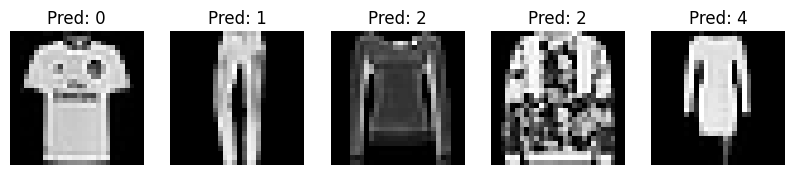

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Pred: {np.argmax(test_pred[i])}")
    ax.axis("off")
plt.show()


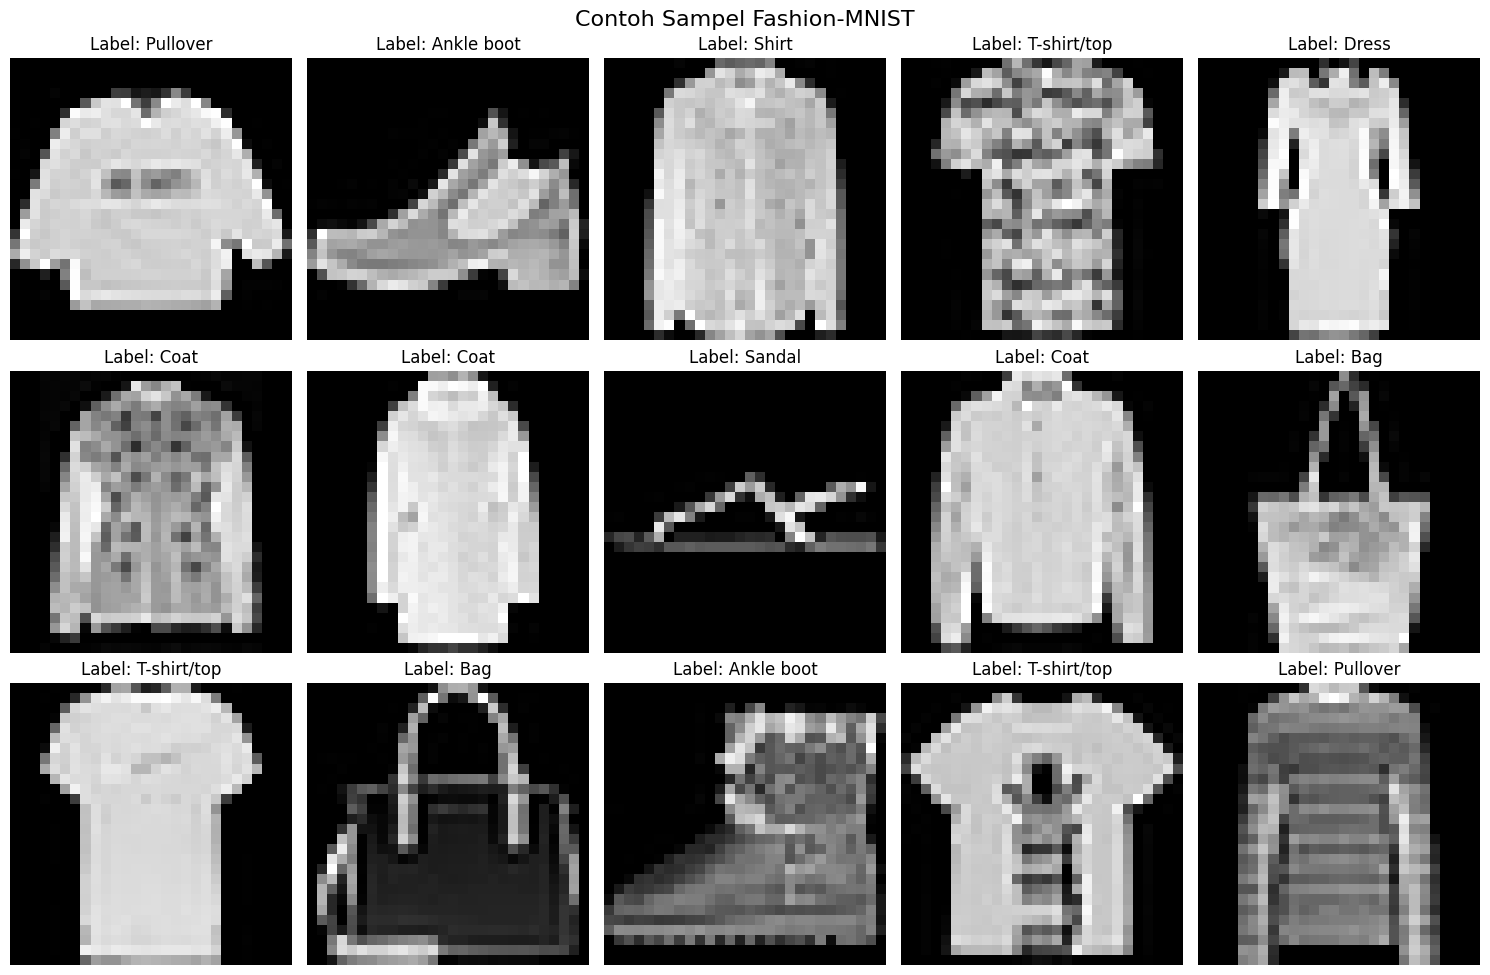

In [16]:
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {class_names[y_train[i]]}")
    ax.axis("off")

plt.suptitle("Contoh Sampel Fashion-MNIST", fontsize=16)
plt.tight_layout()
plt.show()


Distribusi Label Dengan histogram

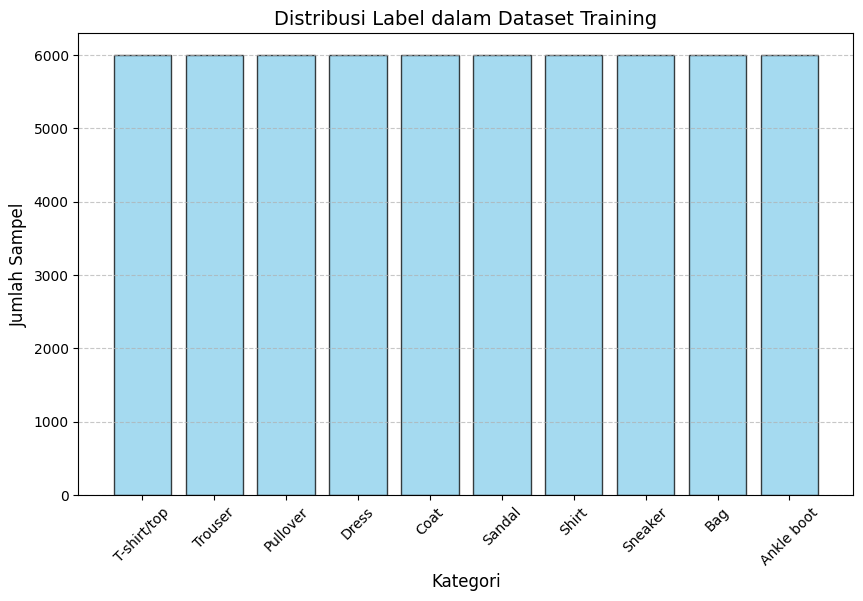

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=np.arange(11)-0.5, rwidth=0.8, alpha=0.75, color='skyblue', edgecolor='black')
plt.xticks(range(10), class_names, rotation=45)
plt.title("Distribusi Label dalam Dataset Training", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Sampel", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Plot perubahan nilai loss dan accuracy selama proses pelatihan

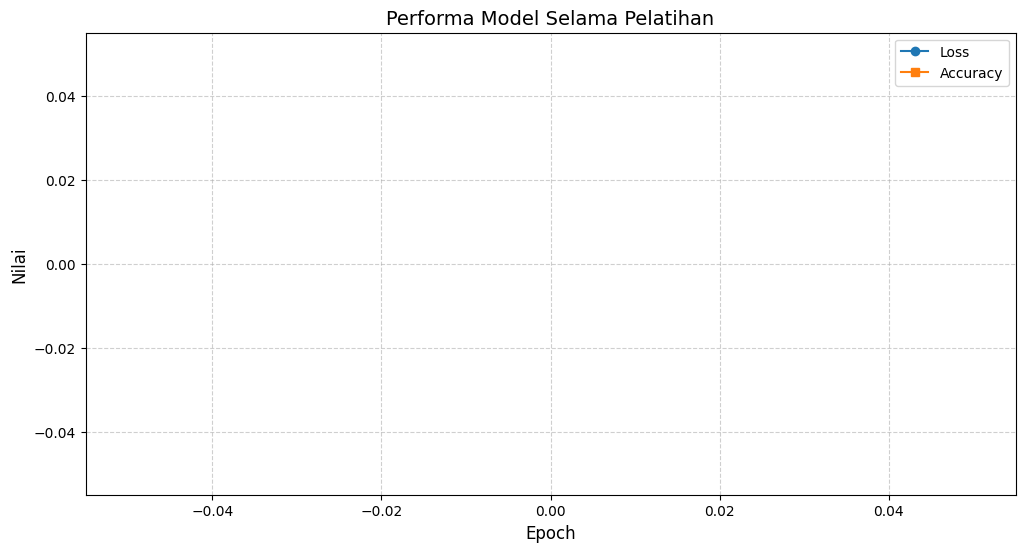

In [18]:
# Data untuk visualisasi (diperoleh selama pelatihan)
losses = []
accuracies = []

epochs_range = range(1, len(losses) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, losses, label="Loss", marker="o")
plt.plot(epochs_range, accuracies, label="Accuracy", marker="s")
plt.title("Performa Model Selama Pelatihan", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Nilai", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Evaluasi prediksi model pada data uji menggunakan matriks kebingungan

<Figure size 1200x1000 with 0 Axes>

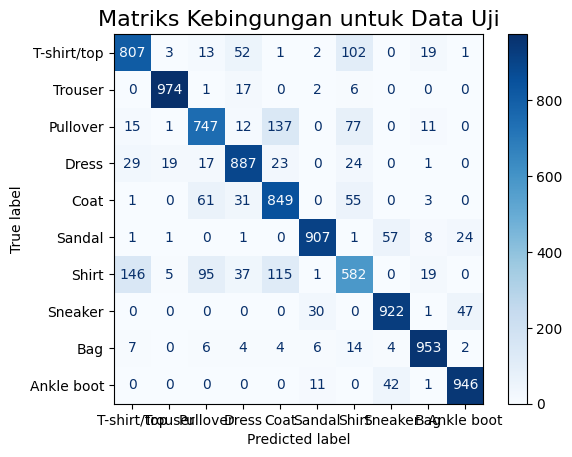

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(test_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriks Kebingungan untuk Data Uji", fontsize=16)
plt.show()


Visualisasi Prediksi yang Salah

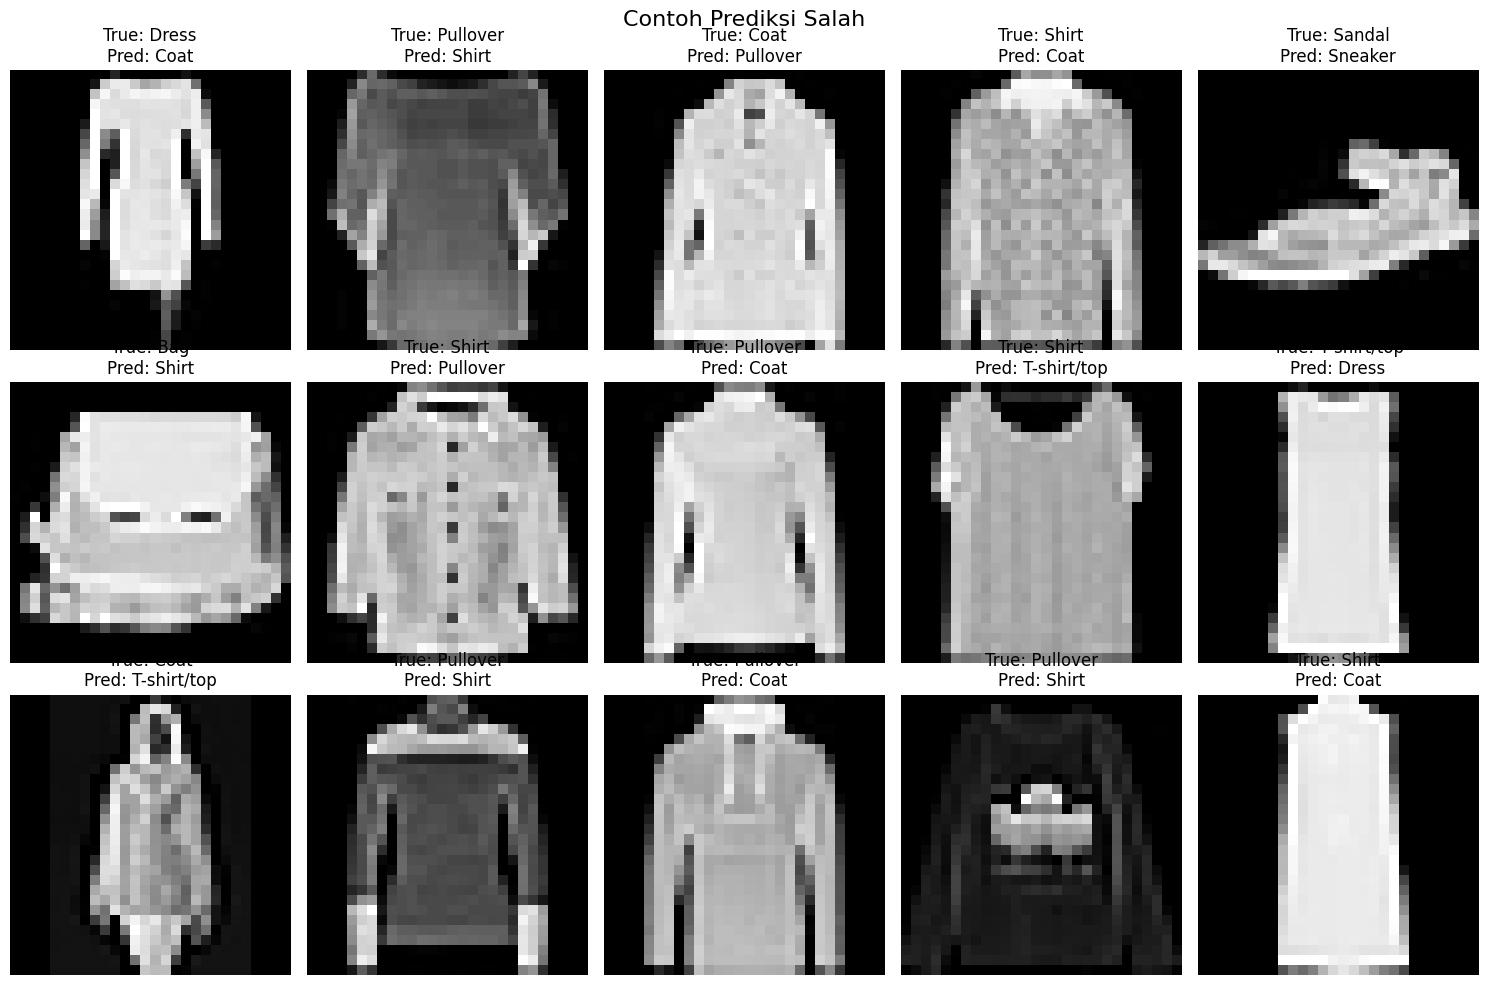

In [20]:
wrong_indices = np.where(y_test != y_pred)[0]


fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axes.flat[:15]):
    idx = wrong_indices[i]
    ax.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
    ax.axis("off")

plt.suptitle("Contoh Prediksi Salah", fontsize=16)
plt.tight_layout()
plt.show()
